# MNIST Digit Recognizer

**Authors: Clement, Calvin, Tilova**

---

Welcome to the very first project of the **Tequila Chicas**! We will be classifying images of hand written numbers to their corresponding digits.

**Importing Libraries**

In [7]:
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# classification model
from sklearn.linear_model import LogisticRegression

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id = 'toc'><a/>
## Table of Contents

---

1. [Data Wrangling](#wrangle)
    - 1.1 [Exploring the Images](#image)
2. [Exploratory Data Analysis](#eda)
3. [Baseline Modelling](#base)

<a id = 'wrangle'><a/>
### 1. Data Wrangling

---

In [10]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [11]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking for null values in the dataframe.

In [6]:
df_train.isna().sum().sum()

0

Checking if there are any duplicates.

In [7]:
df_train.duplicated().sum()

0

Checking the data types of each column. To ensure they are appropriate for the data they represent.

In [8]:
df_train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Great it looks like we have no duplicates or missing values in the dataset. Let's look at some of the summary stats of the data.

In [27]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,...,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,...,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,...,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,...,62.000000,0.0,0.0,0.0,0.0


The labels seem to be pretty evenly distributed since the mean and median are roughly in the middle of the range from 0-9. We should explore this further in the EDA by plotting out the distributions.

<a id = 'toc'><a/>

#### 1.1 Exploring The Images

Since the label and pixels are in the same dataframe we will need to separate them into X (independent) and y (dependent) variables. Additionally, we were given both training and testing sets as CSV from kaggle, so we do not need to perform a train test split ourselves.

In [13]:
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

# sanity check
print(X_train.shape, y_train.shape)

(42000, 784) (42000,)


**Important Notes**
- There are 42000 rows or images with 784 columns or (28 by 28) pixels. This means that the dataset is already flattened out for us.
- We will need to reshape the 1D row into a 2D row with the reshape function from numpy.

Using -1 as a dimension in the reshape() function automatically infers the size for that dimension based on the size of the original array and the other specified dimensions.

In [50]:
images = np.reshape(X_train, [-1, 28, 28])

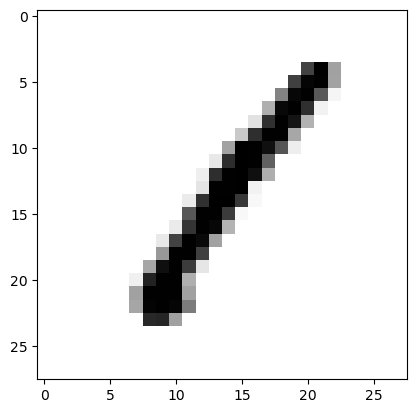

In [51]:
plt.figure()
plt.imshow(images[0], cmap="gray_r")   # plt.imshow() displays the data array as an image
plt.show()

For our first hand drawn image, this definitely looks like a 1. Next, we will iterate through the dataset and see what each class from 0-9 look like as images:
1. We can make a subplot of 10 figures
2. Create a For loop so that our labels (y) matches the 2D array.

**Code explanation**
- The range(10) generates values from 0 to 9
- The axes.ravel() flattens the 2D array of the image into a 1D array
- The zip() numpy function combines the two iterables where each iteration pairs a digit class with a subplot.

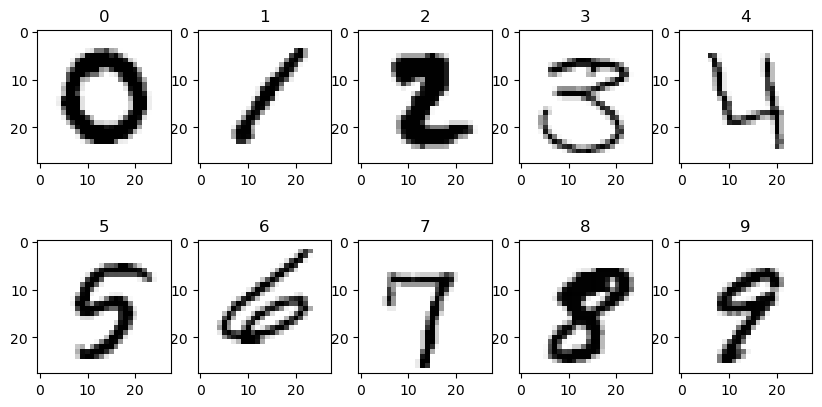

In [52]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(images[y_train==target][0], cmap = 'gray_r')
    ax.set_title(target)
    
plt.show()

Wow some of these numbers are horribly drawn and will be difficult for even humans to read! Next we can use np.mean() to average out what the average hand drawn 0-9 would look like.

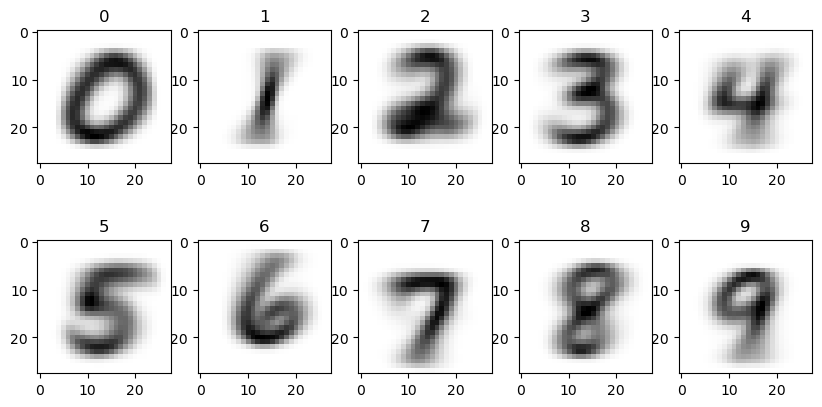

In [53]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(np.mean(images[y_train==target], axis=0), cmap = 'gray_r')
    ax.set_title(target)
    
plt.show()

Once this is averaged out, we can see how most people in this dataset usually draws their digits. It's interesting to see that a lot of people draw a loop inside the `2`. For the digit number `1`, some people have the 1 slanted to the right and some have it slanted to the left.

<a id = 'eda'><a/>
### 2. Exploratory Data Analysis

---

In [9]:
#### CALVIN ADD EDA HERE ###

<a id = 'base'><a/>
### 3. Baseline Modelling

---
    
The 

In [14]:
base_logreg = LogisticRegression()
base_logreg.fit(X_train, y_train)

LogisticRegression()

In [15]:
base_logreg.score(X_train, y_train)

0.9380714285714286

In [20]:
df_test.shape

(28000, 784)

In [58]:
index = range(1, df_test.shape[0] + 1)

In [59]:
logreg_prediction = pd.DataFrame({'Label':base_logreg.predict(df_test)}, index=index)
logreg_prediction.index.name = 'ImageId'
#logreg_prediction.rename(columns={'index':'ImageId', 0: 'Label'}, inplace=True)

In [60]:
logreg_prediction

,Label
ImageId,
1,2
2,0
3,9
4,7
5,3
...,...
27996,9
27997,7
27998,3


In [61]:
logreg_prediction.to_csv('../logreg_prediction.csv')

In [49]:
logreg_prediction.shape

(28000, 2)

From Image Analysis Notebook

In [59]:
base_logreg = LogisticRegression(solver='saga', penalty='l1', C=10.0, max_iter=20, random_state=42)
base_logreg.fit(X_train, y_train)

C:\Users\tingh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10.0, max_iter=20, penalty='l1', random_state=42,
                   solver='saga')

In [62]:
base_logreg.score(X_train, y_train)

0.9364761904761905